#Problem Statement

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Importing dataset
import pandas as pd
df = pd.read_csv(r"C:\Users\Rahul\Desktop\housing project\train.csv")
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [3]:
df.shape

(1168, 81)

In [ ]:
#Their are 1168 rows and 81 columns in dataset

In [4]:
#for displaying max. rows
pd.set_option('display.max_rows', None)

In [5]:
# checking Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [6]:
#checking datatype
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [ ]:
#Three types of data type present in dataset. 1. integer, 2. object, 3. float

In [7]:
#checking for null values
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

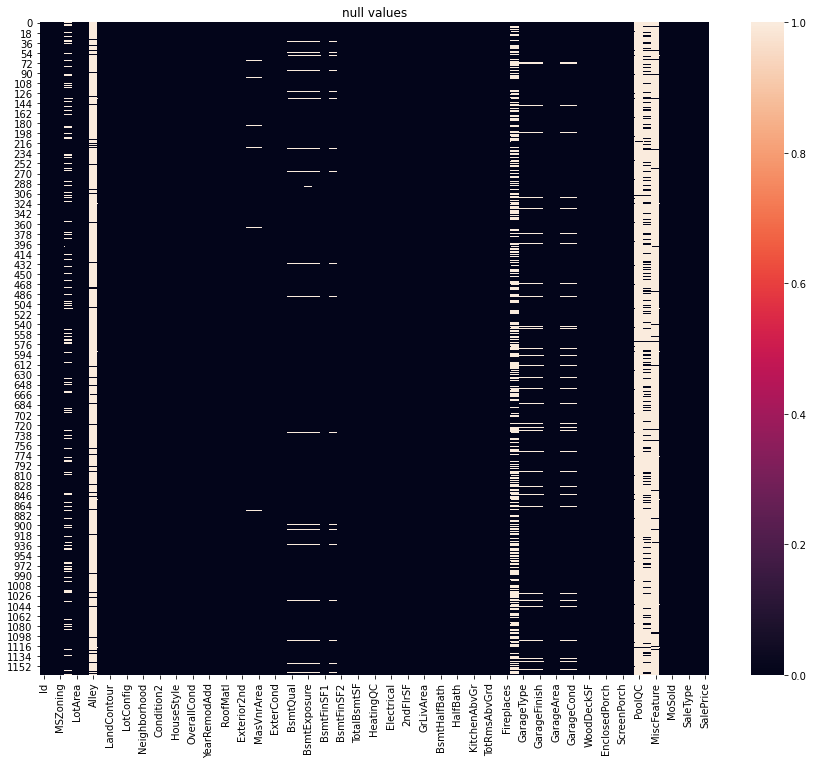

In [8]:
#Heatmap for checking null values
plt.figure(figsize = [15,12])
sns.heatmap(df.isnull())
plt.title("null values")
plt.show()

In [ ]:
# by using above codes for checking null values, it has been observed that null value present in dataset.
#Alley col having 1o91 null values,PoolQC Column having 1161 null values and Miscfeature also having 1124 null values.

In [ ]:
df.columns

In [9]:
#filling null values using mode
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['Fence'] = df['Fence'].fillna(df['Fence'].mode()[0])

In [10]:
#filling null values using mean values
df["LotFrontage"]=df["LotFrontage"].replace(np.NaN,df["LotFrontage"].mean())
df["MasVnrArea"]=df["MasVnrArea"].replace(np.NaN,df["MasVnrArea"].mean())
df["GarageYrBlt"]=df["GarageYrBlt"].replace(np.NaN,df["GarageYrBlt"].mean())

In [11]:
#droping cols having more than 60% null values
del df['PoolQC']
del df['MiscFeature']
del df['Alley']

In [12]:
#checking for null values
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [13]:
#Converting object type data into integers
encode = LabelEncoder() 
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=encode.fit_transform(df[i])

In [ ]:
# as it has been observed that thier are cataegorical columns present in dataset, converted them to intergers for model building

In [14]:
#checking again dataset after converting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   int32  
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   int32  
 6   LotShape       1168 non-null   int32  
 7   LandContour    1168 non-null   int32  
 8   Utilities      1168 non-null   int32  
 9   LotConfig      1168 non-null   int32  
 10  LandSlope      1168 non-null   int32  
 11  Neighborhood   1168 non-null   int32  
 12  Condition1     1168 non-null   int32  
 13  Condition2     1168 non-null   int32  
 14  BldgType       1168 non-null   int32  
 15  HouseStyle     1168 non-null   int32  
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [15]:
#Checking correlation-multivariate analysis
corr_mat=df.corr()
corr_mat

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.004259  0.009307    -0.005969 -0.029212   
MSSubClass     0.004259    1.000000  0.007478    -0.336681 -0.124151   
MSZoning       0.009307    0.007478  1.000000    -0.069661 -0.023328   
LotFrontage   -0.005969   -0.336681 -0.069661     1.000000  0.299452   
LotArea       -0.029212   -0.124151 -0.023328     0.299452  1.000000   
Street         0.003613   -0.035981  0.140215    -0.035309 -0.263973   
LotShape       0.022978    0.104485  0.053655    -0.144523 -0.189201   
LandContour   -0.020245   -0.021387  0.001175    -0.073451 -0.159038   
Utilities           NaN         NaN       NaN          NaN       NaN   
LotConfig      0.053927    0.076880 -0.027246    -0.192468 -0.152063   
LandSlope      0.007152   -0.014930 -0.023952     0.046051  0.395410   
Neighborhood  -0.014989    0.013918 -0.251833     0.065824  0.010707   
Condition1     0.000425   -0.042474 -0.025651    -0.025581  0.029520   
Condition2     0.031623   -0.044319  0.031959     0.011761  0.040096   
BldgType       0.026302    0.731815 -0.024776    -0.403220 -0.215345   
HouseStyle     0.014518    0.381585 -0.110991     0.056321 -0.040637   
OverallQual   -0.036965    0.070462 -0.134037     0.229218  0.107188   
OverallCond    0.039761   -0.056978  0.189553    -0.047573  0.017513   
YearBuilt     -0.016942    0.023988 -0.299732     0.112655  0.005506   
YearRemodAdd  -0.018590    0.056618 -0.174586     0.088799  0.027228   
RoofStyle      0.037059   -0.100641  0.000913     0.146222  0.038615   
RoofMatl      -0.023900   -0.032214  0.009719     0.082566  0.194142   
Exterior1st   -0.045575   -0.090178 -0.012037     0.087727  0.048265   
Exterior2nd   -0.045721   -0.120022  0.005548     0.110762  0.027328   
MasVnrType     0.064161   -0.013252 -0.033521    -0.034388 -0.005204   
MasVnrArea    -0.060503    0.027813 -0.063862     0.188758  0.121086   
ExterQual     -0.006231   -0.024133  0.184815    -0.169835 -0.057865   
ExterCond      0.039946    0.004186 -0.099269     0.044582  0.011438   
Foundation    -0.006339    0.053951 -0.244844     0.090734 -0.021195   
BsmtQual       0.045212   -0.052242  0.123822    -0.176402 -0.075262   
BsmtCond       0.019818   -0.013220  0.002336     0.043165  0.010165   
BsmtExposure  -0.033328   -0.068192  0.037414    -0.123896 -0.136900   
BsmtFinType1   0.012860    0.017515  0.021518    -0.031507 -0.053584   
BsmtFinSF1     0.003868   -0.052236 -0.034161     0.228996  0.221851   
BsmtFinType2   0.037426    0.040573 -0.031322    -0.007509 -0.084713   
BsmtFinSF2     0.005269   -0.062403  0.027055     0.002159  0.056656   
BsmtUnfSF     -0.019494   -0.134170 -0.032638     0.113924  0.006600   
TotalBsmtSF   -0.013812   -0.214042 -0.058896     0.356107  0.259733   
Heating        0.041861    0.047734  0.051188    -0.026622 -0.020394   
HeatingQC      0.005955   -0.001994  0.119852    -0.078262 -0.003337   
CentralAir     0.003921   -0.113883 -0.015887     0.077404  0.051182   
Electrical     0.037801    0.045533 -0.079205     0.066868  0.050388   
1stFlrSF       0.009647   -0.227927 -0.033095     0.403436  0.312843   
2ndFlrSF      -0.029671    0.300366 -0.048968     0.089675  0.059803   
LowQualFinSF  -0.070180    0.053737  0.012098     0.007506 -0.001915   
GrLivArea     -0.024325    0.086448 -0.064125     0.374251  0.281360   
BsmtFullBath   0.023027    0.004556 -0.007287     0.094046  0.142387   
BsmtHalfBath  -0.043572    0.008207  0.006345     0.001389  0.059282   
FullBath      -0.015187    0.140807 -0.188837     0.171773  0.123197   
HalfBath      -0.028512    0.168423 -0.121209     0.047816  0.007271   
BedroomAbvGr   0.009376   -0.013283 -0.001906     0.237199  0.117351   
KitchenAbvGr   0.001216    0.283506  0.026744    -0.002729 -0.013075   
KitchenQual   -0.000240   -0.011378  0.111689    -0.174713 -0.064278   
TotRmsAbvGrd  -0.001613    0.051179 -0.031062     0.318771  0.184546   
Functional     0.019812    0.022913 -0.091684     0.039272 -0

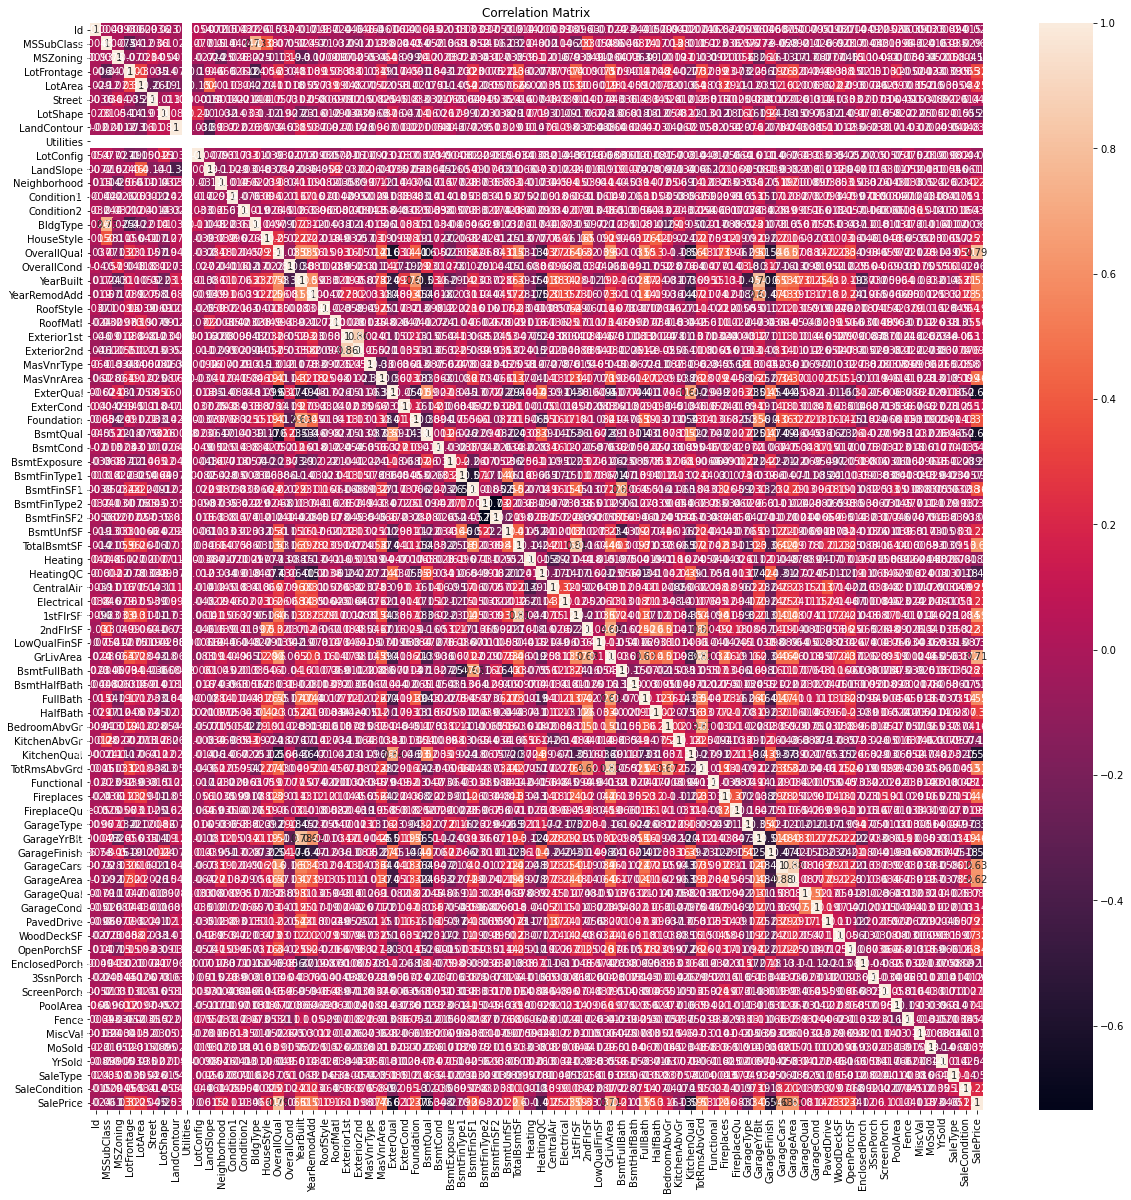

In [16]:
# heatmap for analysing correlation
plt.figure(figsize=[20,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [17]:
#for better understanding correalation with target col.
corr_mat=df.corr()
corr_mat["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.463626
Fireplaces       0.459611
GarageYrBlt      0.458007
Foundation       0.374169
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323779
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle        0.192654
RoofMatl         0.159865
BedroomAbvGr     0.158281
GarageCond       0.135071
Functional       0.118673
ExterCond        0.115167
Exterior1st      0.108451
Condition1       0.105820
PoolArea    

In [ ]:
# 52 columns shown +ve correlation with Target variable, whereas highest correaltion with OverallQual(0.789185)     
# 27 columns shown -ve correlation with target variable
#whereas column(Utilities) doesnt shown any correlation

<function matplotlib.pyplot.show(close=None, block=None)>

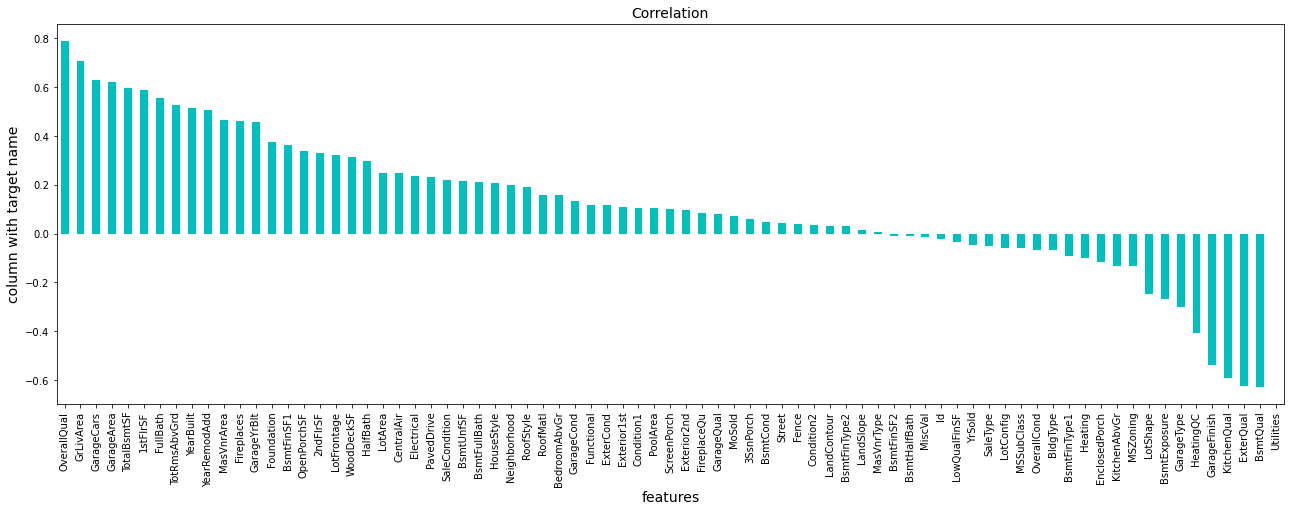

In [18]:
#plotting graph showing +ve and -ve correlation of coloumns
plt.figure(figsize=(22,7))
df.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='c')
plt.xlabel('features', fontsize=14)
plt.ylabel('column with target name', fontsize=14)
plt.title('Correlation', fontsize=14)
plt.show

In [ ]:
#Column Name-Utilities doesnt showing any correlation with the target variable, thatswhy decided to drop it for better model accuracy

In [19]:
#droing Utilites col.
del df['Utilities']

In [20]:
#for statistical summary
df.describe()

Id   MSSubClass     MSZoning  LotFrontage        LotArea  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean    724.136130    56.767979     3.013699    70.988470   10484.749144   
std     416.159877    41.940650     0.633120    22.437056    8957.442311   
min       1.000000    20.000000     0.000000    21.000000    1300.000000   
25%     360.500000    20.000000     3.000000    60.000000    7621.500000   
50%     714.500000    50.000000     3.000000    70.988470    9522.500000   
75%    1079.500000    70.000000     3.000000    79.250000   11515.500000   
max    1460.000000   190.000000     4.000000   313.000000  164660.000000   

            Street     LotShape  LandContour    LotConfig    LandSlope  ...  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000  ...   
mean      0.996575     1.938356     2.773973     3.004281     0.064212  ...   
std       0.058445     1.412262     0.710027     1.642667     0.284088  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       1.000000     0.000000     3.000000     2.000000     0.000000  ...   
50%       1.000000     3.000000     3.000000     4.000000     0.000000  ...   
75%       1.000000     3.000000     3.000000     4.000000     0.000000  ...   
max       1.000000     3.000000     3.000000     4.000000     2.000000  ...   

         3SsnPorch  ScreenPorch     PoolArea        Fence       MiscVal  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean      3.639555    15.051370     3.448630     1.880993     47.315068   
std      29.088867    55.080816    44.896939     0.457685    543.264432   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     0.000000     2.000000      0.000000   
50%       0.000000     0.000000     0.000000     2.000000      0.000000   
75%       0.000000     0.000000     0.000000     2.000000      0.000000   
max     508.000000   480.000000   738.000000     3.000000  15500.000000   

            MoSold       YrSold     SaleType  SaleCondition      SalePrice  
count  1168.000000  1168.000000  1168.000000    1168.000000    1168.000000  
mean      6.344178  2007.804795     7.465753       3.768836  181477.005993  
std       2.686352     1.329738     1.619459       1.112208   79105.586863  
min       1.000000  2006.000000     0.000000       0.000000   34900.000000  
25%       5.000000  2007.000000     8.000000       4.000000  130375.000000  
50%       6.000000  2008.000000     8.000000       4.000000  163995.000000  
75%       8.000000  2009.000000     8.000000       4.000000  215000.000000  
max      12.000000  2010.000000     8.000000       5.000000  755000.000000  

[8 rows x 77 columns]

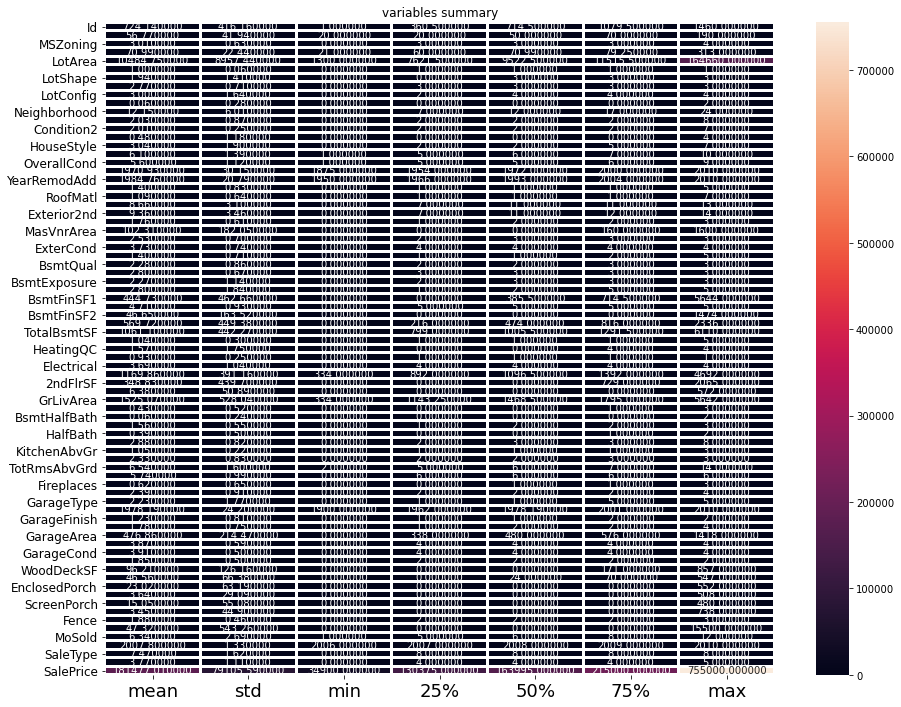

In [21]:
#plotting histogram for df.describe dataset
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variables summary")
plt.show()

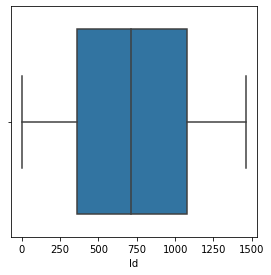

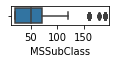

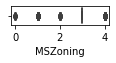

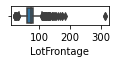

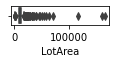

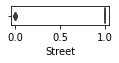

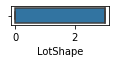

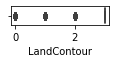

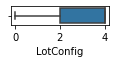

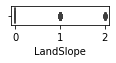

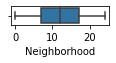

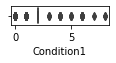

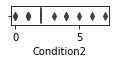

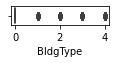

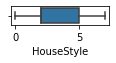

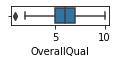

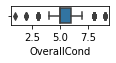

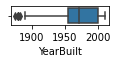

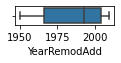

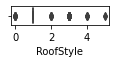

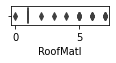

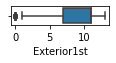

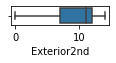

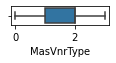

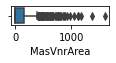

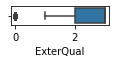

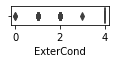

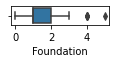

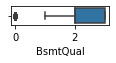

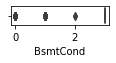

In [22]:
#checking outliers
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column], orient='v')
        plt.xlabel(column, fontsize=10)
    graph+=1
    plt.show()

In [23]:
#outliers is present in many columns, need to remove outliers

In [24]:
#removing outliers using z-score method
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=6
df_new=df[(z<7).all(axis=1)]

In [25]:
print("shape before and after")
print("shape before.ljust(20)",";",df.shape)
print("shape after.ljust(20)",";",df_new.shape)
print("Percentage Loss".ljust(20),";",(df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before.ljust(20) ; (1168, 77)
shape after.ljust(20) ; (1105, 77)
Percentage Loss      ; 0.05393835616438356


In [ ]:
#after treating data for outliers- loosing 5% of data which is acceptable range as data is precisious.

In [26]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Open

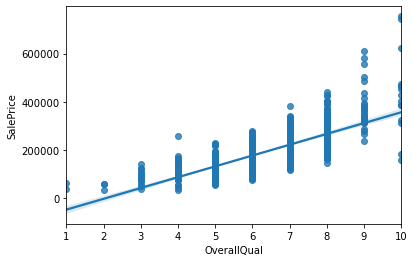

In [27]:
#plot for understanding relation between target col.
ax=sns.regplot(x='OverallQual', y='SalePrice',data=df)

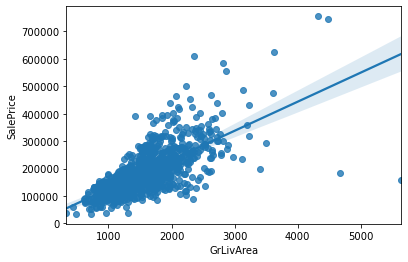

In [28]:
#plot for understanding relation between target col.
ax=sns.regplot(x='GrLivArea', y='SalePrice',data=df)

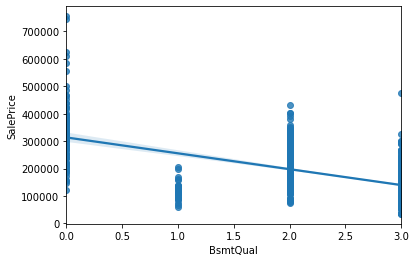

In [29]:
#plot for understanding relation between target col.
ax=sns.regplot(x='BsmtQual', y='SalePrice',data=df)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

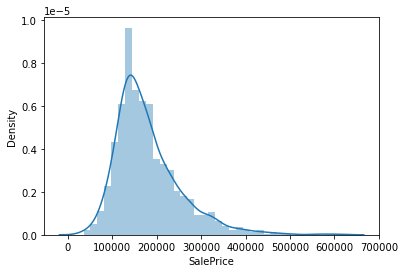

In [30]:
#checking distribution for cols.
sns.distplot(df_new["SalePrice"]) 

In [31]:
#splitting data
x=df_new.drop("SalePrice", axis=1)
y=df_new["SalePrice"]

In [32]:
x.skew()

Id                0.022382
MSSubClass        1.414124
MSZoning         -1.673384
LotFrontage       0.711582
LotArea           3.282760
Street            0.000000
LotShape         -0.627036
LandContour      -3.305287
LotConfig        -1.181125
LandSlope         5.090169
Neighborhood      0.055283
Condition1        3.166539
Condition2       -8.944525
BldgType          2.292630
HouseStyle        0.277177
OverallQual       0.122902
OverallCond       0.613561
YearBuilt        -0.596257
YearRemodAdd     -0.508032
RoofStyle         1.506901
RoofMatl         11.258684
Exterior1st      -0.620321
Exterior2nd      -0.603099
MasVnrType       -0.093388
MasVnrArea        2.387056
ExterQual        -1.836538
ExterCond        -2.577040
Foundation       -0.021144
BsmtQual         -1.346741
BsmtCond         -3.269240
BsmtExposure     -1.197845
BsmtFinType1     -0.070731
BsmtFinSF1        0.734943
BsmtFinType2     -3.657565
BsmtFinSF2        4.294882
BsmtUnfSF         0.927073
TotalBsmtSF       0.513126
H

In [33]:
#columns showing skewness need to remove for better model building

In [34]:
#treating skewness
from sklearn.preprocessing import power_transform
import pandas as pd
x = power_transform(x, method='yeo-johnson')
x = pd.DataFrame(x)

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif
#selecting best features
best_features = SelectKBest(score_func=f_classif, k=50)
fit = best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

#concatenate dataframe
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature_Name', 'scores']
print(feature_scores.nlargest(50,'scores'))

#export selected features to .csv
df_best_feat=feature_scores.nlargest(50,'scores')
df_best_feat.to_csv('variable_selection.csv', index=False)

    Feature_Name    scores
15            15  5.113210
44            44  3.101018
25            25  2.977492
59            59  2.713447
17            17  2.590302
47            47  2.540822
60            60  2.476752
36            36  2.316113
28            28  2.257320
37            37  2.227182
51            51  2.190904
58            58  2.146889
41            41  2.060144
57            57  2.036470
75            75  1.945843
18            18  1.837642
52            52  1.785458
74            74  1.760590
65            65  1.615407
27            27  1.568265
54            54  1.562489
39            39  1.507721
38            38  1.427589
55            55  1.426625
6              6  1.400126
29            29  1.388849
2              2  1.366058
3              3  1.359130
4              4  1.340174
10            10  1.340162
32            32  1.330312
48            48  1.290675
43            43  1.282139
24            24  1.274677
64            64  1.251252
49            49  1.213533
3

In [43]:
#splitling into tRain and test
from sklearn.model_selection import train_test_split

In [66]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df=sc.fit_transform(x)

In [67]:
#creating new X dataframe
new_x=df[df_best_feat.Feature_Name]

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import  r2_score

In [69]:
#creating train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30)

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model_RFR = RandomForestRegressor(max_depth=10)

model_RFR.fit(x_train, y_train)

predict_train = model_RFR.predict(x_train)
predict_test = model_RFR.predict(x_train)

print('RMSE on train data: ', mean_squared_error(y_train, predict_train)**(0.5))
print('RMSE on test data: ', mean_squared_error(y_train, predict_test)**(0.5))

RMSE on train data:  10796.844023541582
RMSE on test data:  10796.844023541582


In [50]:
#DTR Model
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.745750014764093
1332699055.8373494


In [51]:
#model-RFR
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.8433260768673434
601591842.0296221


In [52]:
#XGB
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
y_pred = GBR.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.8818167284238435
505534860.57767075


In [53]:
#LinearRegression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.8184290189545177
776693038.1388824


In [54]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.7093083897366461
989968462.0655422


In [57]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x, y, cv=3)
print("Cross validation score of DecisionTree model :", scr.mean())

Cross validation score of DecisionTree model : 0.693471962659186


In [60]:
scr=cross_val_score(rfr, x, y, cv=3)
print("Cross validation score of RandomForestRegressor model :", scr.mean())

Cross validation score of RandomForestRegressor model : 0.8751553209432936


In [59]:
scr=cross_val_score(GBR, x, y, cv=3)
print("Cross validation score of GradientBoostingRegressor :", scr.mean())

Cross validation score of GradientBoostingRegressor : 0.8921599051068848


In [61]:
scr=cross_val_score(lr, x, y, cv=3)
print("Cross validation score of linearregression :", scr.mean())

Cross validation score of linearregression : 0.8513120079522114


In [62]:
scr=cross_val_score(knn, x, y, cv=3)
print("Cross validation score of KNeighborsRegressor :", scr.mean())

Cross validation score of KNeighborsRegressor : 0.7912860300252094


In [72]:
#Best model Hypertunning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [73]:
#GradientBoostingRegressor
parameters = {'loss' :['ls', 'lad', 'huber', 'quantile'],
             'n_estimators':[100,200,300],
             'criterion': ['friedman_mse', 'mse', 'mae']}

In [74]:
GCV = GridSearchCV(GradientBoostingRegressor(),parameters,cv=3)

In [75]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'n_estimators': [100, 200, 300]})

In [76]:
GCV.best_params_

{'criterion': 'mae', 'loss': 'huber', 'n_estimators': 100}

In [77]:
mod=GradientBoostingRegressor(criterion='mae', loss='huber', n_estimators=100)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

89.14730750260156


In [78]:
#saving model
import joblib
joblib.dump(mod,"Housing prediction.pkl")

['Housing prediction.pkl']

IMPORTING TEST DATASET for processing

In [80]:
#importing test dataset
import pandas as pd
df = pd.read_csv(r"C:\Users\Rahul\Desktop\housing project\test.csv")
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
5     650         180       RM         21.0     1936   Pave   NaN      Reg   
6    1453         180       RM         35.0     3675   Pave   NaN      Reg   
7     152          20       RL        107.0    13891   Pave   NaN      Reg   
8     427          80       RL          NaN    12800   Pave   NaN      Reg   
9     776         120       RM         32.0     4500   Pave   NaN      Reg   
10     30          30       RM         60.0     6324   Pave   NaN      IR1   
11   1425          20       RL          NaN     9503   Pave   NaN      Reg   
12    423          20       RL        100.0    21750   Pave   NaN      Reg   
13   1185          20       RL         50.0    35133   Grvl   NaN      Reg   
14    775          20       RL        110.0    14226   Pave   NaN      Reg   
15    391          50       RL         50.0     8405   Pave  Grvl      Reg   
16   1408          20       RL          NaN     8780   Pave   NaN      IR1   
17    513          20       RL         70.0     9100   Pave   NaN      Reg   
18   1266         160       FV         35.0     3735   Pave   NaN      Reg   
19    173         160       RL         44.0     5306   Pave   NaN      IR1   
20   1150          70       RM         50.0     9000   Pave   NaN      Reg   
21    797          20       RL         71.0     8197   Pave   NaN      Reg   
22    137          20       RL          NaN    10355   Pave   NaN      IR1   
23    706         190       RM         70.0     5600   Pave   NaN      Reg   
24   1377          30       RL         52.0     6292   Pave   NaN      Reg   
25   1177          20       RL         37.0     6951   Pave   NaN      IR1   
26   1456          60       RL         62.0     7917   Pave   NaN      Reg   
27    369          20       RL         78.0     7800   Pave   NaN      Reg   
28   1421          60       RL         90.0    11700   Pave   NaN      Reg   
29    999          30       RM         60.0     9786   Pave   NaN      Reg   
30   1217          90       RM         68.0     8930   Pave   NaN      Reg   
31    937          20       RL         67.0    10083   Pave   NaN      Reg   
32    769          20       RL         70.0     9100   Pave   NaN      Reg   
33    831          20       RL         80.0    11900   Pave   NaN      IR1   
34    678          30       RL         52.0     9022   Pave   NaN      Reg   
35    574          80       RL         76.0     9967   Pave   NaN      IR1   
36    921          60       RL         70.0     8462   Pave   NaN      IR1   
37   1292         160       RM         21.0     1680   Pave   NaN      Reg   
38   1277          60       RL          NaN    12936   Pave   NaN      IR1   
39    676         160       RL         24.0     2289   Pave   NaN      Reg   
40    108          20       RM         50.0     6000   Pave   NaN      Reg   
41    424          60       RL         80.0     9200   Pave   NaN      Reg   
42    823          60       RL          NaN    12394   Pave   NaN      IR1   
43   1455          20       FV         62.0     7500   Pave  Pave      Reg   
44    377          85       RL         57.0     8846   Pave   NaN      IR1   
45   1256          50       RM         52.0     6240   Pave   NaN      Reg   
46   1120          20       RL         70.0     7560   Pave   NaN      Reg   
47    265          30       RM         30.0     5232   Pave  Grvl      IR3   
48   1158         120       RL         34.0     5001   Pave   NaN      IR1   
49    725          20       RL         86.0    13286   Pave   NaN      IR1   
50   1378          50       R

In [83]:
df.shape

(292, 80)

In [ ]:
#having 292 rows and 80 columns

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [ ]:
#observed three types data-1 Integers, 2 Float, 3. object

In [82]:
# Checking datatypes
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [84]:
#checking null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

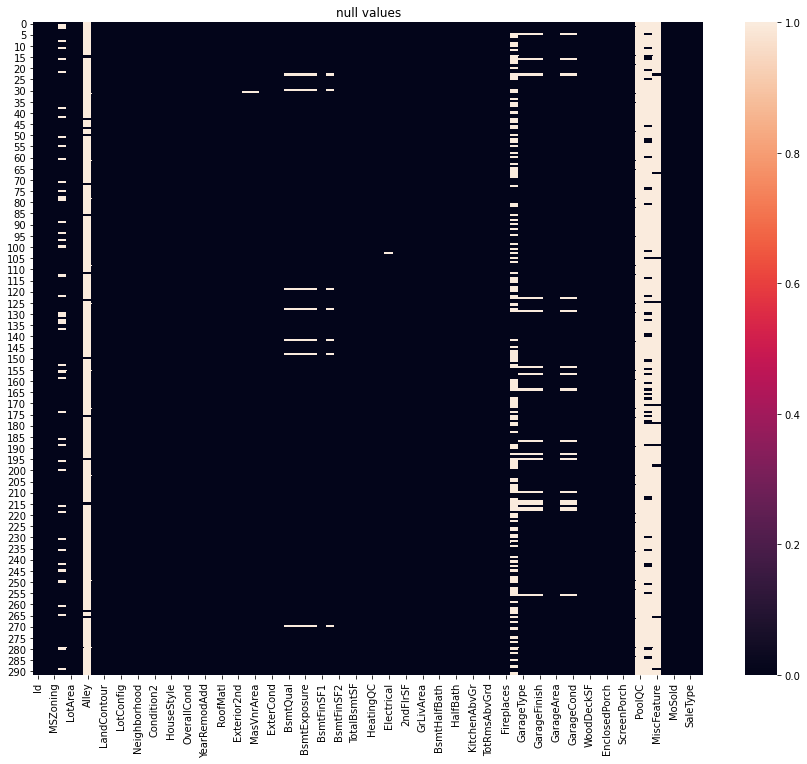

In [85]:
#Heatmap for checking null values
plt.figure(figsize = [15,12])
sns.heatmap(df.isnull())
plt.title("null values")
plt.show()

In [87]:
#treating null values
#filling null values using mode
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['Fence'] = df['Fence'].fillna(df['Fence'].mode()[0])
df['Alley'] = df['Alley'].fillna(df['Alley'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['MiscFeature'] = df['MiscFeature'].fillna(df['MiscFeature'].mode()[0])

In [86]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [88]:
#filling null values using mean values
df["LotFrontage"]=df["LotFrontage"].replace(np.NaN,df["LotFrontage"].mean())
df["GarageYrBlt"]=df["GarageYrBlt"].replace(np.NaN,df["GarageYrBlt"].mean())
df["PoolQC"]=df["PoolQC"].replace(np.NaN,df["PoolQC"].mean())

In [89]:
#Converting object type data into integers
encode = LabelEncoder() 
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=encode.fit_transform(df[i])

In [90]:
#multivariate analysis
corr_mat=df.corr()
corr_mat

Id  MSSubClass  MSZoning   LotFrontage   LotArea  \
Id             1.000000    0.035247 -0.087799 -1.650463e-02 -0.045497   
MSSubClass     0.035247    1.000000  0.266517 -4.547863e-01 -0.186654   
MSZoning      -0.087799    0.266517  1.000000 -3.357540e-01 -0.117968   
LotFrontage   -0.016505   -0.454786 -0.335754  1.000000e+00  0.370091   
LotArea       -0.045497   -0.186654 -0.117968  3.700907e-01  1.000000   
Street         0.025743    0.004588 -0.063162 -5.653141e-02 -0.069626   
Alley          0.041420    0.031969 -0.037882 -1.007724e-01 -0.035848   
LotShape       0.066225    0.176681  0.167716 -1.477204e-01 -0.110574   
LandContour   -0.018921    0.068736 -0.099137 -8.616251e-02 -0.131482   
Utilities      0.025083   -0.050183 -0.016825  7.751122e-18  0.016430   
LotConfig      0.030673    0.071784  0.055261 -1.244696e-01 -0.042599   
LandSlope      0.002456   -0.073979 -0.035312  1.764061e-01  0.620079   
Neighborhood  -0.014366   -0.081962 -0.204984  1.848165e-01  0.137189   
Condition1    -0.013734    0.042599 -0.059909  6.435003e-02  0.010799   
Condition2    -0.096323   -0.036770  0.105995 -1.888734e-02 -0.019035   
BldgType       0.002641    0.798007  0.230251 -4.365928e-01 -0.190456   
HouseStyle     0.032030    0.455233 -0.068366 -8.095049e-02 -0.015258   
OverallQual    0.005823   -0.116077 -0.276394  2.547601e-01  0.109161   
OverallCond   -0.089945   -0.068113  0.191126 -9.657145e-02 -0.071113   
YearBuilt     -0.000174    0.041932 -0.378803  1.469608e-01  0.037757   
YearRemodAdd  -0.036955   -0.023317 -0.159359  5.661040e-02 -0.022957   
RoofStyle      0.042134   -0.183492 -0.031210  1.992216e-01  0.182766   
RoofMatl      -0.019185   -0.019367 -0.022604  7.730798e-02  0.004290   
Exterior1st    0.007124   -0.103303 -0.028611  1.816818e-02 -0.124700   
Exterior2nd   -0.033156   -0.202425 -0.028994  3.588119e-02 -0.101138   
MasVnrType     0.005608   -0.092343  0.010358  5.515856e-02 -0.016483   
MasVnrArea    -0.012331    0.002761 -0.107413  1.361195e-01  0.062943   
ExterQual      0.028969    0.009859  0.245917 -2.403551e-01 -0.060410   
ExterCond     -0.024688   -0.051525 -0.096395  7.545029e-02  0.026250   
Foundation     0.059518    0.072808 -0.195382  1.309653e-01  0.013464   
BsmtQual       0.073208    0.000375  0.138389 -1.363634e-01 -0.041860   
BsmtCond      -0.062007   -0.015342 -0.111940  1.292092e-01  0.021130   
BsmtExposure   0.006055   -0.049358  0.050552 -1.141495e-01 -0.162388   
BsmtFinType1   0.025637    0.003453  0.038716 -7.482261e-03 -0.087270   
BsmtFinSF1    -0.040462   -0.142908 -0.153966  1.525661e-01  0.209632   
BsmtFinType2   0.073628    0.043449 -0.015825 -1.151487e-01 -0.030670   
BsmtFinSF2    -0.051283   -0.079328  0.012808  2.452086e-01  0.277855   
BsmtUnfSF      0.041345   -0.169129 -0.123688  1.615165e-01 -0.029717   
TotalBsmtSF   -0.019326   -0.336822 -0.270929  3.987949e-01  0.283111   
Heating        0.043572    0.049709  0.094397  1.185172e-02  0.179646   
HeatingQC     -0.012178    0.118102  0.228922 -1.189785e-01  0.016198   
CentralAir     0.031490   -0.053192 -0.235065  3.170288e-02  0.049270   
Electrical     0.039030    0.077471 -0.036969  2.167349e-02  0.027693   
1stFlrSF       0.019726   -0.350270 -0.212694  4.634734e-01  0.286714   
2ndFlrSF       0.144675    0.338926 -0.030786 -1.454691e-02  0.030128   
LowQualFinSF   0.087688    0.012343  0.010704  2.027295e-01  0.030371   
GrLivArea      0.139969    0.030615 -0.176389  3.338084e-01  0.231721   
BsmtFullBath  -0.077773   -0.000676 -0.084559  8.546433e-02  0.212162   
BsmtHalfBath   0.062190   -0.041577 -0.017534 -4.463190e-02  0.020883   
FullBath       0.083174    0.095903 -0.236326  2.277179e-01  0.141118   
HalfBath       0.146049    0.213601 -0.179885  3.655521e-02  0.034980   
BedroomAbvGr   0.152676   -0.061750 -0.104881  2.275345e-01  0.134990   
KitchenAbvGr   0.007486    0.275461  0.150506 -1.120087e-02 -0.030264   
KitchenQual   -0.024404    0.093439  0.198917 -2.464131e-01 -0.041457   
TotRms

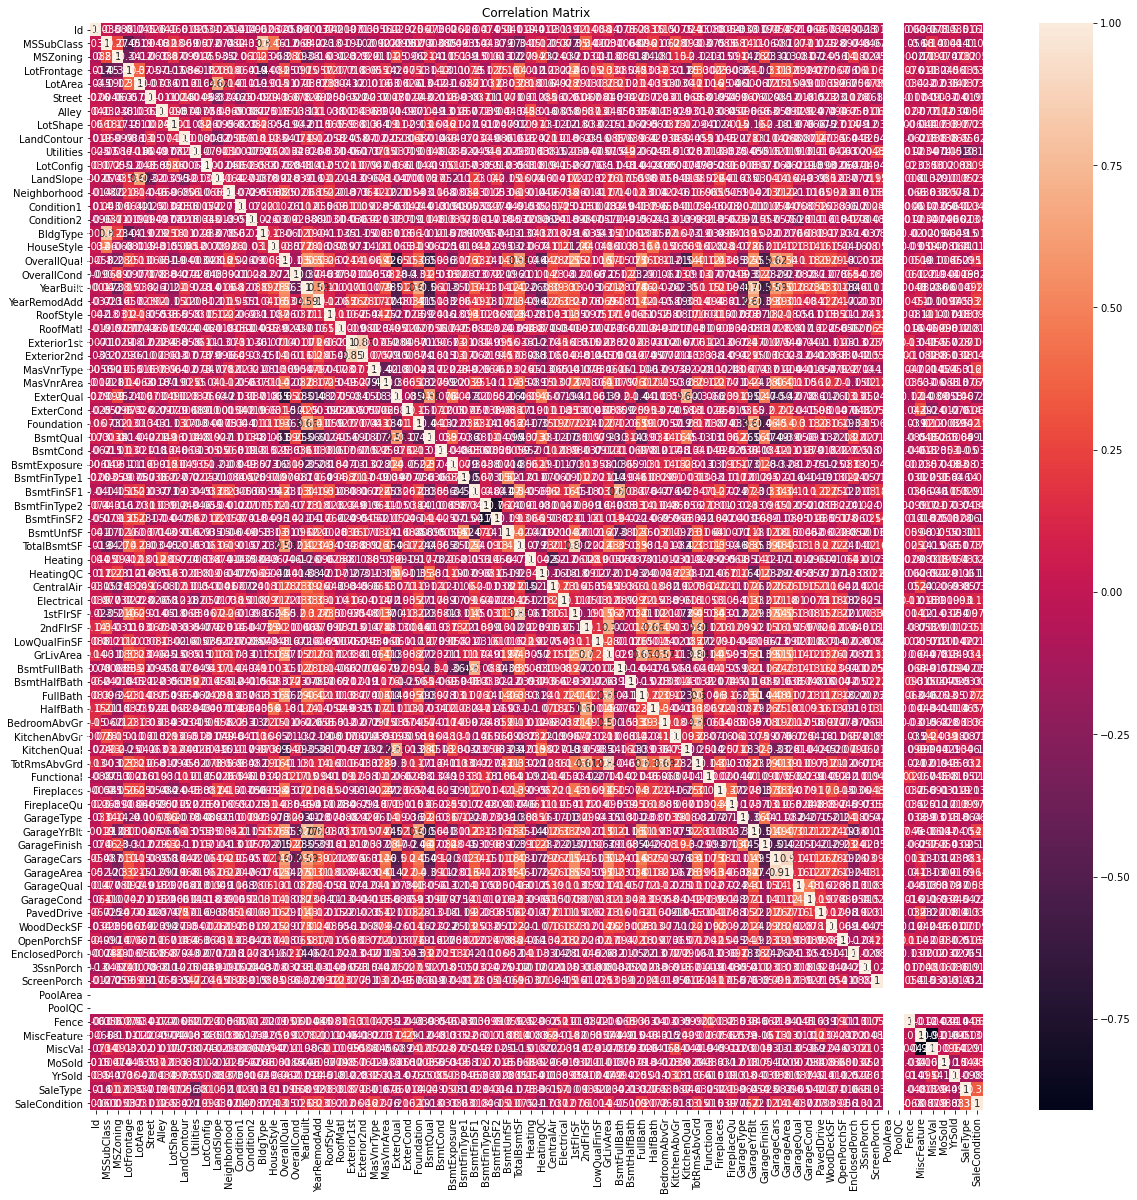

In [91]:
# heatmap for analysing correlation
plt.figure(figsize=[20,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [94]:
# drping col doesnt have correlation with other columns
del df['PoolArea']
del df['PoolQC']

In [95]:
#Describing dataset
df.describe()

Id  MSSubClass    MSZoning  LotFrontage        LotArea  \
count   292.000000  292.000000  292.000000   292.000000     292.000000   
mean    755.955479   57.414384    2.136986    66.425101   10645.143836   
std     442.565228   43.780649    0.478114    19.975962   13330.669795   
min       6.000000   20.000000    0.000000    21.000000    1526.000000   
25%     377.750000   20.000000    2.000000    57.750000    7200.000000   
50%     778.000000   50.000000    2.000000    66.425101    9200.000000   
75%    1152.250000   70.000000    2.000000    76.000000   11658.750000   
max    1456.000000  190.000000    3.000000   150.000000  215245.000000   

           Street       Alley    LotShape  LandContour   Utilities  ...  \
count  292.000000  292.000000  292.000000   292.000000  292.000000  ...   
mean     0.993151    0.017123    1.958904     2.791096    0.003425  ...   
std      0.082618    0.129954    1.398953     0.699182    0.058521  ...   
min      0.000000    0.000000    0.000000     0.000000    0.000000  ...   
25%      1.000000    0.000000    0.000000     3.000000    0.000000  ...   
50%      1.000000    0.000000    3.000000     3.000000    0.000000  ...   
75%      1.000000    0.000000    3.000000     3.000000    0.000000  ...   
max      1.000000    1.000000    3.000000     3.000000    1.000000  ...   

       EnclosedPorch   3SsnPorch  ScreenPorch       Fence  MiscFeature  \
count     292.000000  292.000000   292.000000  292.000000   292.000000   
mean       17.708904    2.489726    15.099315    1.924658     0.996575   
std        51.892906   30.247488    58.483473    0.362989     0.058521   
min         0.000000    0.000000     0.000000    0.000000     0.000000   
25%         0.000000    0.000000     0.000000    2.000000     1.000000   
50%         0.000000    0.000000     0.000000    2.000000     1.000000   
75%         0.000000    0.000000     0.000000    2.000000     1.000000   
max       330.000000  407.000000   396.000000    3.000000     1.000000   

           MiscVal      MoSold       YrSold    SaleType  SaleCondition  
count   292.000000  292.000000   292.000000  292.000000     292.000000  
mean     28.184932    6.232877  2007.859589    4.828767       1.914384  
std     224.036218    2.774556     1.322867    0.744829       0.576932  
min       0.000000    1.000000  2006.000000    0.000000       0.000000  
25%       0.000000    4.000000  2007.000000    5.000000       2.000000  
50%       0.000000    6.000000  2008.000000    5.000000       2.000000  
75%       0.000000    8.000000  2009.000000    5.000000       2.000000  
max    3500.000000   12.000000  2010.000000    5.000000       3.000000  

[8 rows x 78 columns]

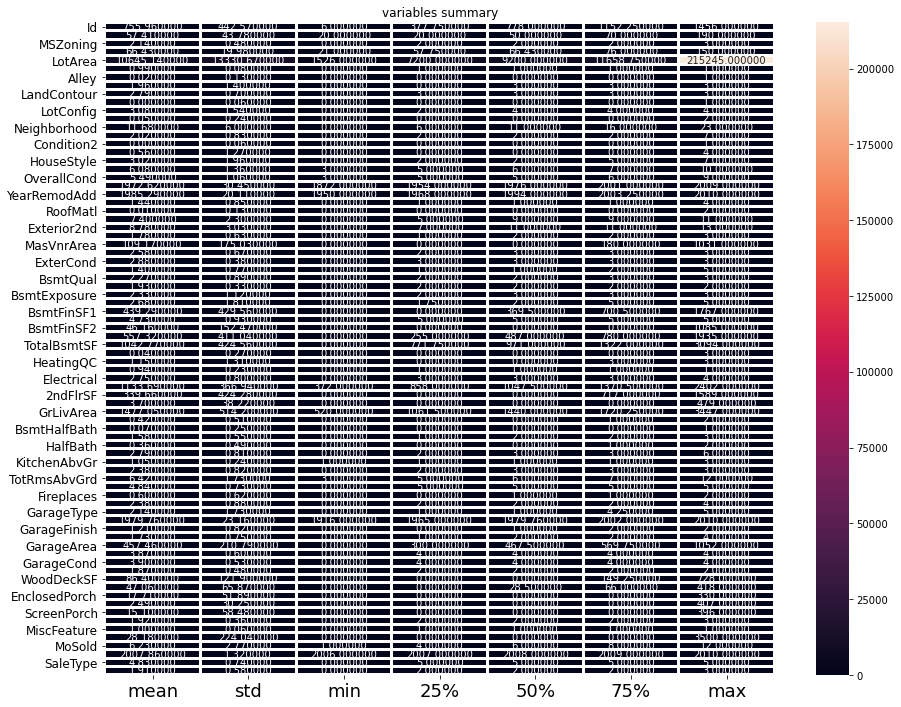

In [96]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variables summary")
plt.show()

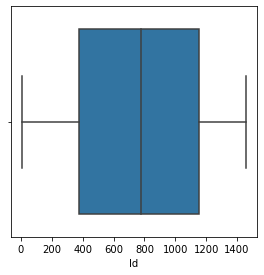

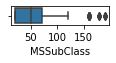

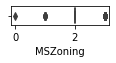

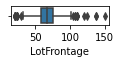

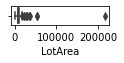

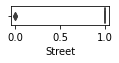

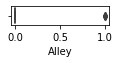

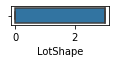

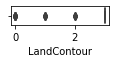

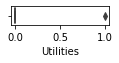

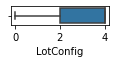

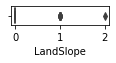

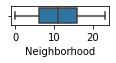

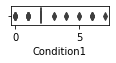

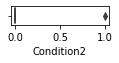

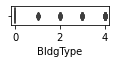

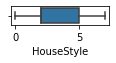

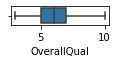

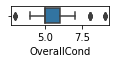

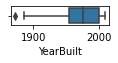

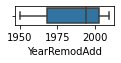

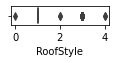

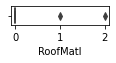

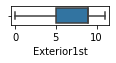

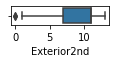

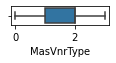

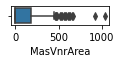

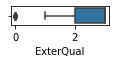

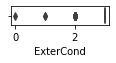

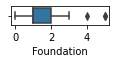

In [97]:
#checking outliers
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column], orient='v')
        plt.xlabel(column, fontsize=10)
    graph+=1
    plt.show()

In [ ]:
# outliers  present in some columns, categorical columns not treated

In [100]:
df.skew()

Id               -0.108806
MSSubClass        1.358597
MSZoning          0.187174
LotFrontage       0.466813
LotArea          12.781805
Street          -12.020386
Alley             7.482782
LotShape         -0.639195
LandContour      -3.332422
Utilities        17.088007
LotConfig        -1.204667
LandSlope         4.639043
Neighborhood      0.046894
Condition1        2.808950
Condition2       17.088007
BldgType          1.997202
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
RoofStyle         1.386333
RoofMatl         13.717569
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrType        0.037914
MasVnrArea        1.973451
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1      0.040656
BsmtFinSF1        0.739790
BsmtFinType2     -3.702330
BsmtFinSF2        3.698543
B

In [ ]:
# skewness present in categorical columns not treated